# 0. 분석 방향
* 제공 받은 log 데이터(activity, combat, pledge, trade, payment)를 하나의 데이터프레임으로 만들고 분석을 통해 새로운 정보를 얻고 feature를 만들 예정이다.

# 1. 도입(라이브러리, 데이터 로딩)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
#from scipy import stats
import scipy as sp

#ignore warning
import warnings
warnings.filterwarnings('ignore')
from collections import OrderedDict

import os
%matplotlib inline

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# log 데이터(activity, combat, pledge, trade, payment)를 하나의 데이터프레임으로 만들고 preprocessing, feature engineering를 load 
import basic_preprocessing

In [3]:
train = basic_preprocessing.getTrainData()
trainLabel = basic_preprocessing.getTrainLabelData()

In [4]:
train.head()

,acc_id,target_survival_time,target_amount_spent,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,enchant_count,game_money_change,activity_row_count,charid_sum_count,server_sum_count,day_sum_count,zero_cnt_activity,day_combat,pledge_cnt,random_attacker_cnt_combat,random_defender_cnt_combat,temp_cnt_combat,same_pledge_cnt_combat,etc_cnt_combat,num_opponent,class_concat_count,charid_concat_count_combat,server_concat_count_combat,level_concat_count,day_concat_count_combat,level_mean,level_max,combat_row_count,zero_cnt_combat,amount_spent,payment_row_count,amount_spent_mean,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt_pledge,random_defender_cnt_pledge,same_pledge_cnt_pledge,temp_cnt_pledge,etc_cnt_pledge,combat_play_time_pledge,non_combat_play_time_pledge,day_concat_count_pledge,charid_concat_count_pledge,server_concat_count_pledge,pledgeid_concat_count_pledge,pledge_row_count,play_char_mean,combat_char_mean,play_combat_char_ratio,zero_cnt_pledge,kind,day_sum_count_trade,server_sum_count_trade,char_sum_count_trade,type_1_accid_account,trade_source_count,trade_target_count,type_1,type_0_source_count,type_0_target_count,type_0,type_total_sum,type_0_is_open,item_accessory_count,item_adena_count,item_armor_count,item_enchant_scroll_count,item_etc_count,item_spell_count,item_weapon_count,item_accessory_out_count,item_adena_out_count,item_armor_out_count,item_enchant_scroll_out_count,item_etc_out_count,item_spell_out_count,item_weapon_out_count,type_0_avenue,not_any_trade,not_any_payment,non_any_pledge,in_item_sum,out_item_sum,activity_summarise,combat_summarise,pledge_summarise,activity_active_count,combat_active_count,pledge_active_count,playtime_day,amount_spent_day,royalty_week_1,royalty_week_2,royalty_week_3,royalty_week_4,survival_check_val_1,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_2s,day_3s,day_4s,day_5s,day_6s,day_7s
0,27835,64,0.00,9.85,12.77,0.13,0.00,0.02,1,0.25,0.25,0.00,1.18,0.00,0.00,0.15,41,3,1,26,4,661,0.00,0.00,0.00,1.92,0.00,2.14,1.96,2,3,1,2,26,13.50,17,41,4,0.87,3.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,-1.25,-1.27,-5.69,-1.16,-23.16,13,11,0,0.38,0.03,0.86,0.86,1.00,1.00,2.12,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
1,12351,64,0.12,80.99,37.12,0.53,0.04,0.02,7,0.98,0.99,0.00,41.42,0.00,0.00,2.52,75,8,5,28,3,1192,7.12,0.00,4.73,5.76,0.00,2.36,12.85,6,8,5,6,28,11.83,17,75,2,0.53,1.00,0.53,89.68,31.22,31.07,9.46,6.15,55.70,50.13,18.86,104.08,0.17,28.00,5.00,5.00,5.00,68.00,1.32,0.46,0.43,0.00,train,11.00,1.00,2.00,5.00,5.00,6.00,11.00,0.00,14.00,14.00,25.00,0.00,0.00,1.29,0.00,0.00,0.00,0.00,0.00,0.00,5.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,-0.28,0.77,7.85,13.33,20.11,14,13,18,2.89,0.02,1.00,1.00,1.00,1.00,3.57,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
2,125437,55,0.18,39.55,13.48,0.18,0.02,0.13,7,12.05,12.12,0.00,23.85,0.00,0.00,5.73,35,3,1,27,3,476,2.63,0.00,2.37,0.00,0.00,4.05,6.77,2,3,1,3,27,9.00,17,35,3,1.82,3.00,0.61,48.58,28.62,7.50,18.11,2.86,39.79,26.11,34.20,76.62,0.00,27.00,1.00,1.00,1.00,27.00,1.80,1.06,0.59,1.00,train,13.00,1.00,1.00,17.00,18.00,19.00,37.00,0.00,25.00,25.00,62.00,0.00,0.00,4.24,0.00,0.00,0.00,0.00,0.00,0.00,1.08,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0,0,1.16,6.06,5.55,0.78,12.70,14,12,17,1.46,0.07,0.86,1.00,1.00,1.00,2.95,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
3,104483,64,0.02,60.90,48.69,0.24,0.00,0.01,2,1.48,1.48,31.90,2.02,0.11,0.00,1.51,48,2,1,27,1,687,0.00,0.00,16.56,1.92,0.00,2.14,2.75,1,2,1,2,27,11.50,17,48,3,0.37,1.00,0.37,72.14,7.33,0.31,7.36,2.58,13.53,20.57,1.32,37

# 2. EDA

## 2.1 sruvival_time(Target)

In [5]:
train.head()

,acc_id,target_survival_time,target_amount_spent,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,enchant_count,game_money_change,activity_row_count,charid_sum_count,server_sum_count,day_sum_count,zero_cnt_activity,day_combat,pledge_cnt,random_attacker_cnt_combat,random_defender_cnt_combat,temp_cnt_combat,same_pledge_cnt_combat,etc_cnt_combat,num_opponent,class_concat_count,charid_concat_count_combat,server_concat_count_combat,level_concat_count,day_concat_count_combat,level_mean,level_max,combat_row_count,zero_cnt_combat,amount_spent,payment_row_count,amount_spent_mean,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt_pledge,random_defender_cnt_pledge,same_pledge_cnt_pledge,temp_cnt_pledge,etc_cnt_pledge,combat_play_time_pledge,non_combat_play_time_pledge,day_concat_count_pledge,charid_concat_count_pledge,server_concat_count_pledge,pledgeid_concat_count_pledge,pledge_row_count,play_char_mean,combat_char_mean,play_combat_char_ratio,zero_cnt_pledge,kind,day_sum_count_trade,server_sum_count_trade,char_sum_count_trade,type_1_accid_account,trade_source_count,trade_target_count,type_1,type_0_source_count,type_0_target_count,type_0,type_total_sum,type_0_is_open,item_accessory_count,item_adena_count,item_armor_count,item_enchant_scroll_count,item_etc_count,item_spell_count,item_weapon_count,item_accessory_out_count,item_adena_out_count,item_armor_out_count,item_enchant_scroll_out_count,item_etc_out_count,item_spell_out_count,item_weapon_out_count,type_0_avenue,not_any_trade,not_any_payment,non_any_pledge,in_item_sum,out_item_sum,activity_summarise,combat_summarise,pledge_summarise,activity_active_count,combat_active_count,pledge_active_count,playtime_day,amount_spent_day,royalty_week_1,royalty_week_2,royalty_week_3,royalty_week_4,survival_check_val_1,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_2s,day_3s,day_4s,day_5s,day_6s,day_7s
0,27835,64,0.00,9.85,12.77,0.13,0.00,0.02,1,0.25,0.25,0.00,1.18,0.00,0.00,0.15,41,3,1,26,4,661,0.00,0.00,0.00,1.92,0.00,2.14,1.96,2,3,1,2,26,13.50,17,41,4,0.87,3.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,-1.25,-1.27,-5.69,-1.16,-23.16,13,11,0,0.38,0.03,0.86,0.86,1.00,1.00,2.12,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
1,12351,64,0.12,80.99,37.12,0.53,0.04,0.02,7,0.98,0.99,0.00,41.42,0.00,0.00,2.52,75,8,5,28,3,1192,7.12,0.00,4.73,5.76,0.00,2.36,12.85,6,8,5,6,28,11.83,17,75,2,0.53,1.00,0.53,89.68,31.22,31.07,9.46,6.15,55.70,50.13,18.86,104.08,0.17,28.00,5.00,5.00,5.00,68.00,1.32,0.46,0.43,0.00,train,11.00,1.00,2.00,5.00,5.00,6.00,11.00,0.00,14.00,14.00,25.00,0.00,0.00,1.29,0.00,0.00,0.00,0.00,0.00,0.00,5.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,-0.28,0.77,7.85,13.33,20.11,14,13,18,2.89,0.02,1.00,1.00,1.00,1.00,3.57,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
2,125437,55,0.18,39.55,13.48,0.18,0.02,0.13,7,12.05,12.12,0.00,23.85,0.00,0.00,5.73,35,3,1,27,3,476,2.63,0.00,2.37,0.00,0.00,4.05,6.77,2,3,1,3,27,9.00,17,35,3,1.82,3.00,0.61,48.58,28.62,7.50,18.11,2.86,39.79,26.11,34.20,76.62,0.00,27.00,1.00,1.00,1.00,27.00,1.80,1.06,0.59,1.00,train,13.00,1.00,1.00,17.00,18.00,19.00,37.00,0.00,25.00,25.00,62.00,0.00,0.00,4.24,0.00,0.00,0.00,0.00,0.00,0.00,1.08,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0,0,1.16,6.06,5.55,0.78,12.70,14,12,17,1.46,0.07,0.86,1.00,1.00,1.00,2.95,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
3,104483,64,0.02,60.90,48.69,0.24,0.00,0.01,2,1.48,1.48,31.90,2.02,0.11,0.00,1.51,48,2,1,27,1,687,0.00,0.00,16.56,1.92,0.00,2.14,2.75,1,2,1,2,27,11.50,17,48,3,0.37,1.00,0.37,72.14,7.33,0.31,7.36,2.58,13.53,20.57,1.32,37

### 빈도

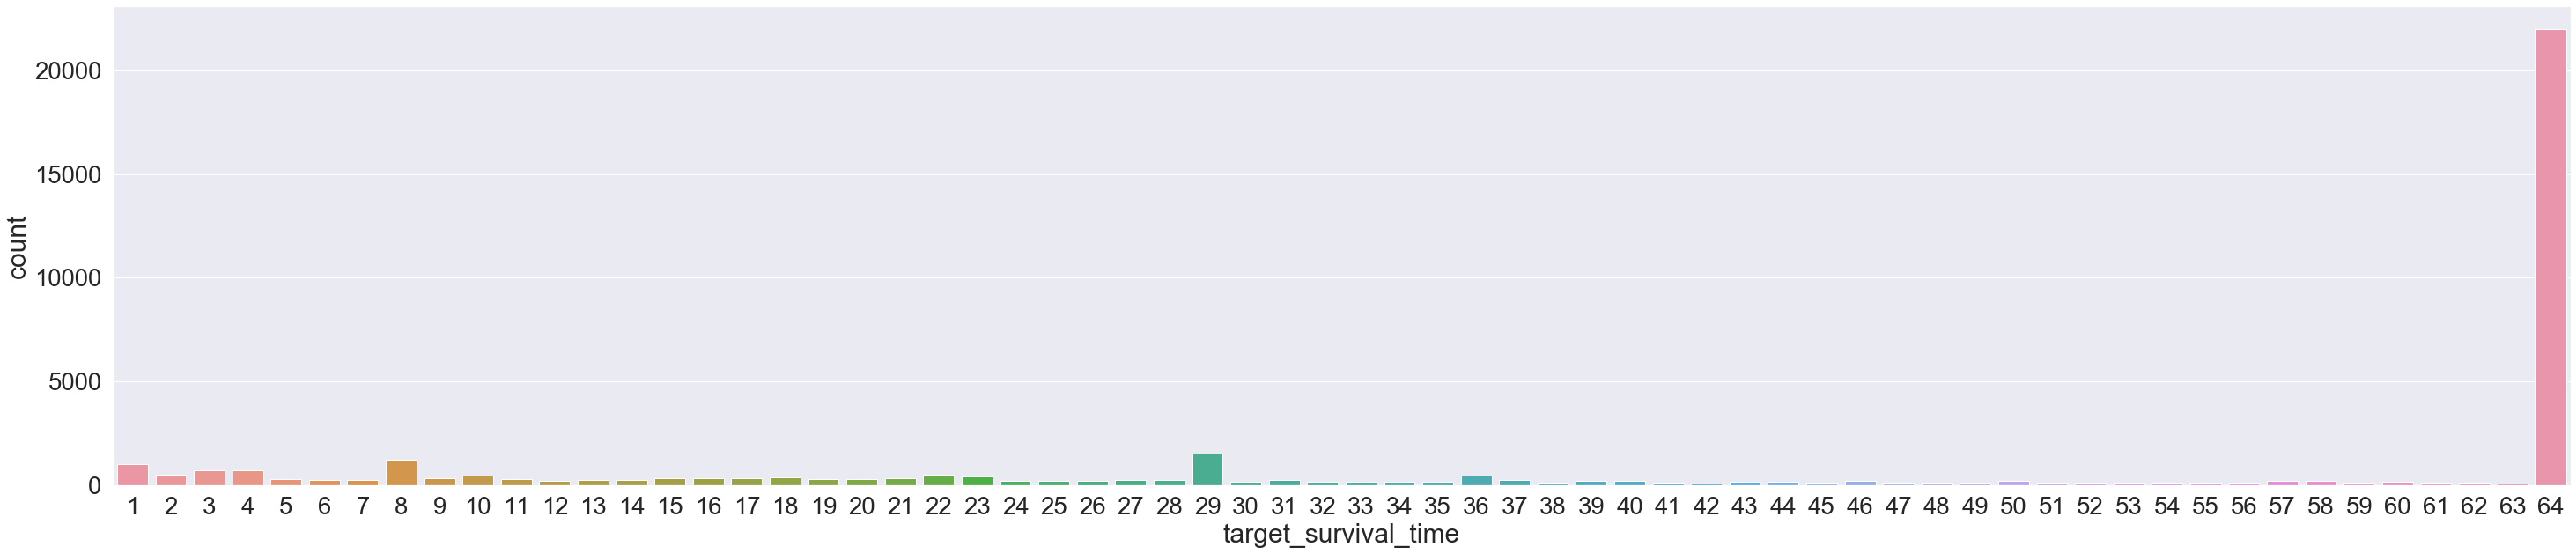

In [6]:
plt.figure(figsize=(50,10))
sns.barplot(
    x = 'target_survival_time',
    y = 'acc_id',
    data = train.groupby('target_survival_time').count().reset_index()
)
plt.ylabel('count')
plt.show()

In [7]:
targetSurvivalTimeRate = train.groupby('target_survival_time').count().reset_index()[['target_survival_time','acc_id']].rename(columns={'acc_id':'count'})
targetSurvivalTimeRate['rate'] = targetSurvivalTimeRate['count'] / train.shape[0] * 100
targetSurvivalTimeRate.sort_values('rate', ascending=0)

,target_survival_time,count,rate
63,64,21996,54.99
28,29,1500,3.75
7,8,1219,3.05
0,1,1012,2.53
2,3,719,1.80
...,...,...,...
53,54,113,0.28
44,45,102,0.26
46,47,98,0.24
62,63,92,0.23


* 상단 부분이 survival_time = 64 인것을 알 수 있다.
* 예측 모델만들때 0~63과 1을 분류하는 것 먼저 만들면 될 것 같다.

### 상관계수(전체)

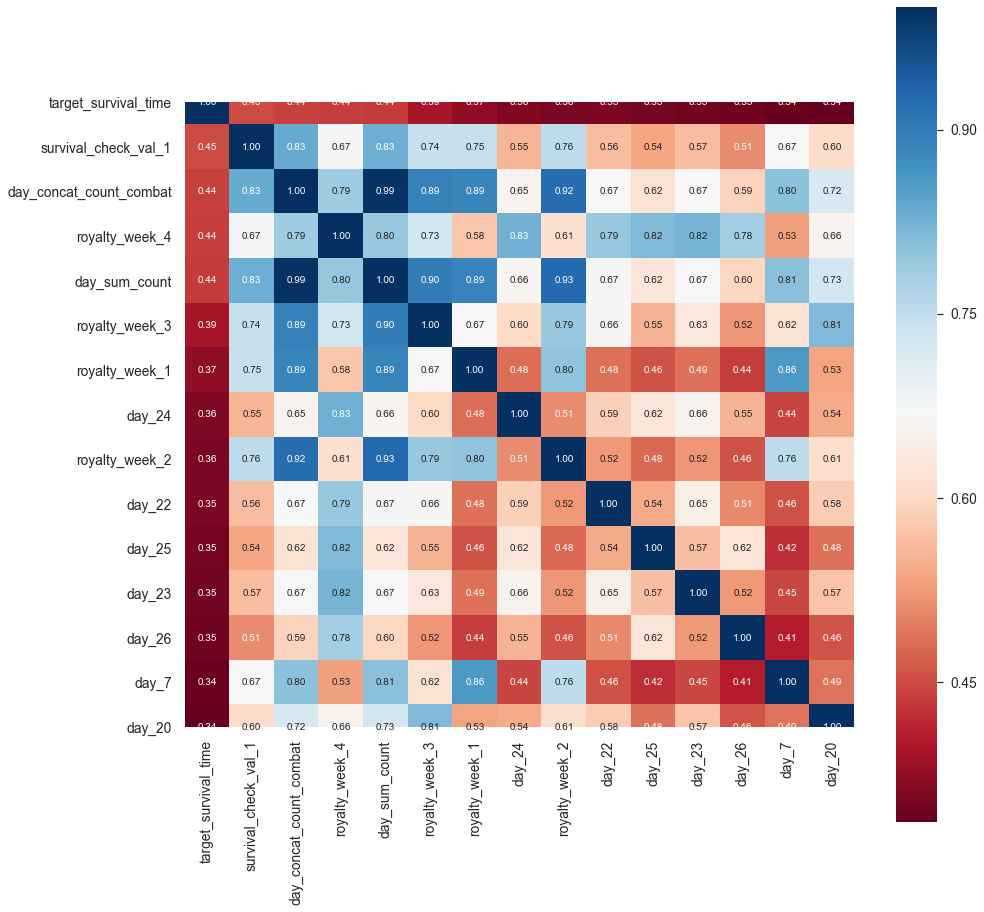

In [32]:
k = 15
cols = train.corr().nlargest(k, 'target_survival_time')['target_survival_time'].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap=plt.cm.RdBu, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 상관계수(!=64)

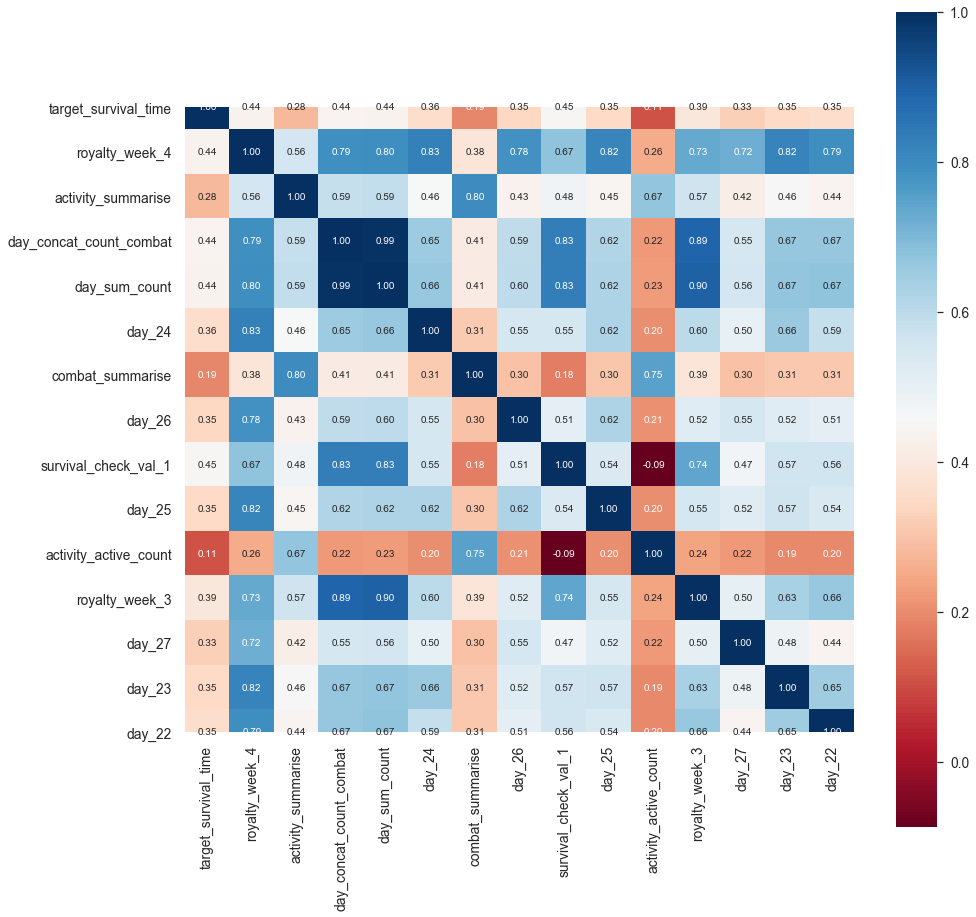

In [15]:
k = 15
cols = train[train['target_survival_time'] != 64].corr().nlargest(k, 'target_survival_time')['target_survival_time'].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap=plt.cm.RdBu, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 2.2 target_amount_spent(Target)

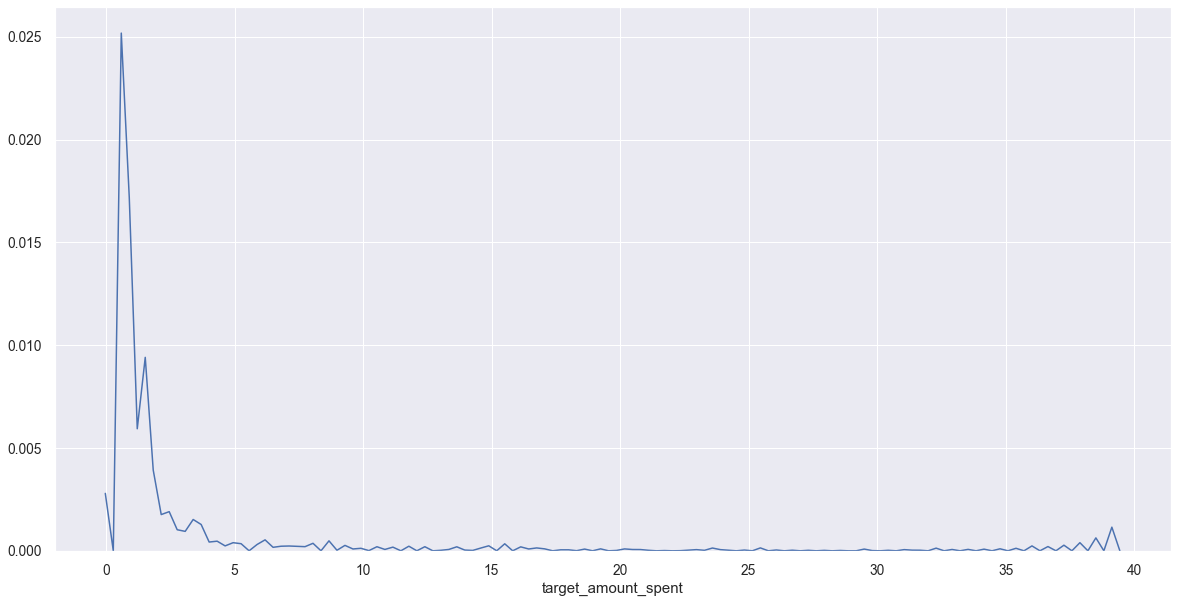

In [9]:
plt.figure(figsize=(20,10))
sns.distplot(
    train['target_amount_spent'],
    hist=False
)
plt.show()

* 대부분의 사람이 적은 금액을 결제함

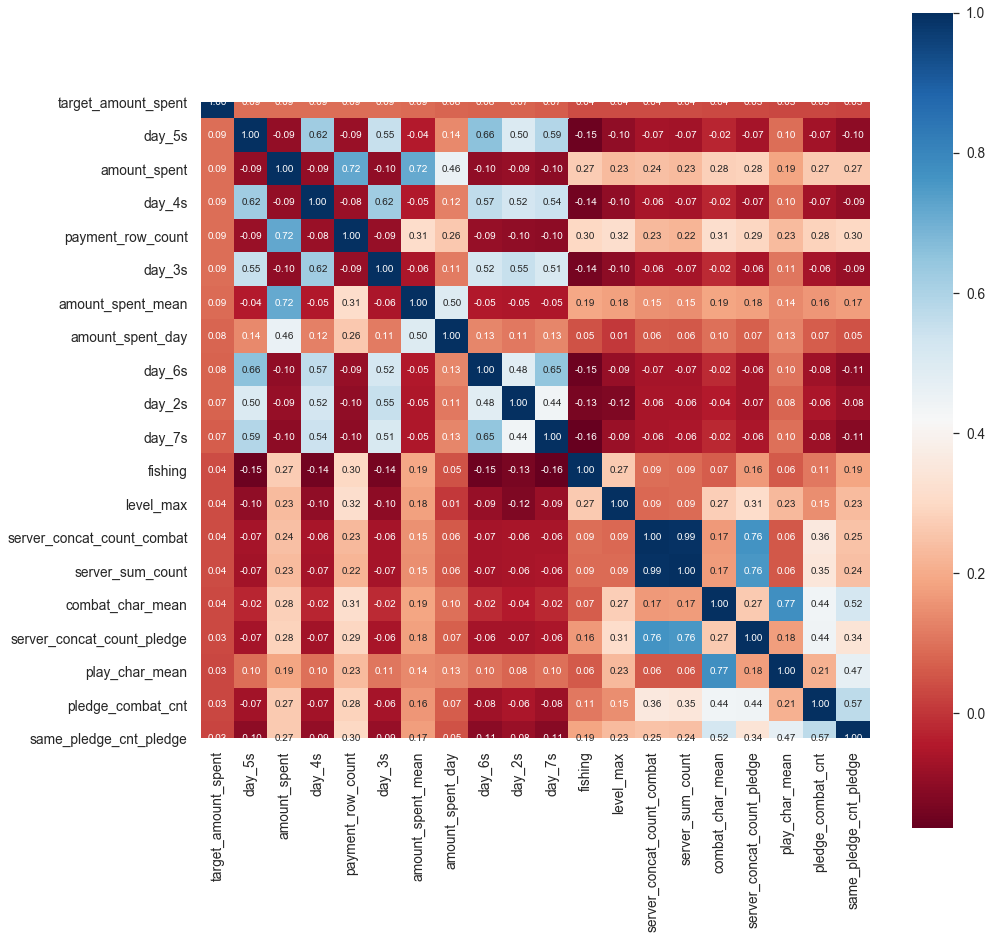

In [10]:
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target_amount_spent')['target_amount_spent'].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap=plt.cm.RdBu, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 2.3 survivaltime과 amount_spent

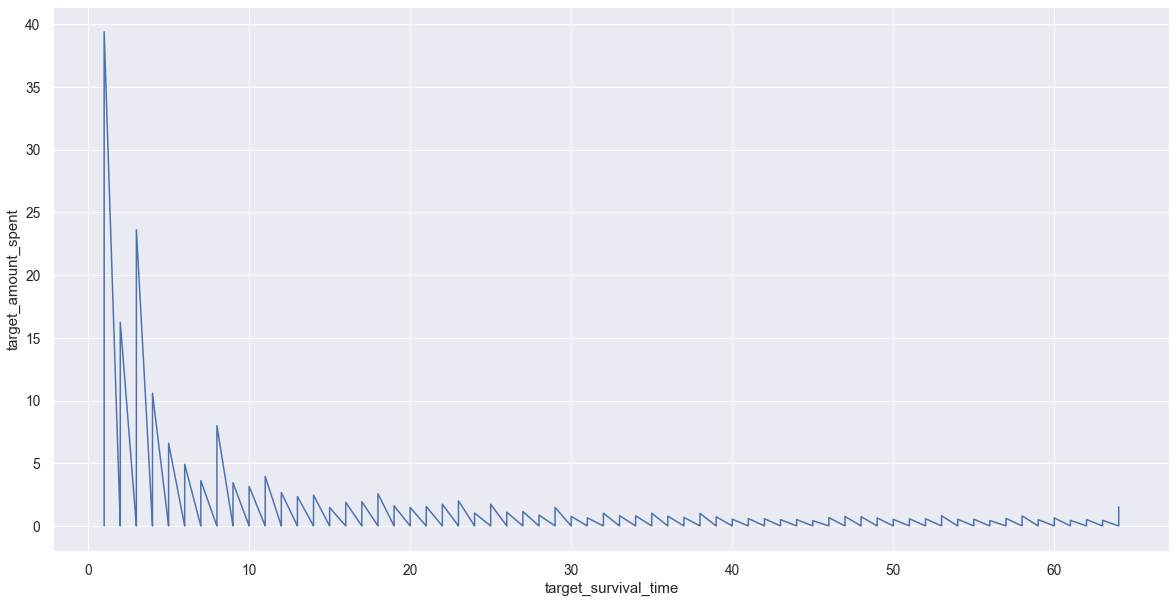

In [11]:
plt.figure(figsize=(20,10))
sns.lineplot(
    x = 'target_survival_time',
    y = 'target_amount_spent',
    data = train,
    estimator=None
)
plt.show()

* survival_time가 낮을 수록 결제를 많이 하는 것을 알 수 있다.
* survival_time을 먼저 예측 후 amount_time를 예측하는데 사용하면 도움이 될 것 같다.

## T-test (survival_time != 64, survival_time == 64)

In [43]:
for i in train[train['acc_id'].isin(train[train['target_survival_time'] == 64]['acc_id'])].describe().columns :
    if(i in ['target_survival_time','kind_sum_count','kind_concat_count_combat','target_is_survival_time','target_survival_time','target_amount_spent']) or bool(re.match('day_[0-9]', i)) or bool(re.match('royalty_week', i)):
        continue
    t_test = sp.stats.ttest_ind(
        train[~(train['acc_id'].isin(train[train['target_survival_time'] == 64]['acc_id']))][i],
        train[train['acc_id'].isin(train[train['target_survival_time'] == 64]['acc_id'])][i],
        equal_var=False
    )
    if t_test.pvalue == 0:
        print("{}, {}".format(i,t_test))


playtime, Ttest_indResult(statistic=-54.74855429591251, pvalue=0.0)
private_shop, Ttest_indResult(statistic=-56.284670739314876, pvalue=0.0)
activity_row_count, Ttest_indResult(statistic=-41.9058854319467, pvalue=0.0)
day_sum_count, Ttest_indResult(statistic=-70.47756250379477, pvalue=0.0)
day_combat, Ttest_indResult(statistic=-43.07733384309273, pvalue=0.0)
day_concat_count_combat, Ttest_indResult(statistic=-71.36522400370653, pvalue=0.0)
combat_row_count, Ttest_indResult(statistic=-45.21528556336088, pvalue=0.0)
day_sum_count_trade, Ttest_indResult(statistic=-62.4363701258024, pvalue=0.0)
type_0_is_open, Ttest_indResult(statistic=-44.91965586819344, pvalue=0.0)
playtime_day, Ttest_indResult(statistic=-48.53219788448469, pvalue=0.0)
survival_check_val_1, Ttest_indResult(statistic=-87.36531570462292, pvalue=0.0)


* T-test를 통해 survival_time != 64와 survival_time == 64 두 집단을 비교
* p-value를 0으로 설정 (sp.stats.ttest_ind 함수는 p-value가 특정 임계치가 넘어가면 0으로 반환)
* 이 변수를 활용해서 변수 생성.(min-max scaler를 사용하여 두 집단의 차이를 표현에 초점)

# 3. Feature Engineering

**FE를 통해 추가한 변수 리스트**

* **not_any_payment** : 결제 여부
* **non_any_pledge** : 혈맹 활동 여부
* **in_item_sum** : 구입한 아이템들 총 합
* **out_item_sum** : 판매한 아이템들 총 합
* **activity_summarise** : activity data 총 합
* **combat_summarise** : combat data 총 합
* **pledge_summarise** : pledge data 총 합
* **activity_active_count** : activity data 중 0이 아닌 개수
* **combat_active_count** : combat data 중 0이 아닌 개수
* **pledge_active_count** : pledge data 중 0이 아닌 개수
* **playtime_day** : 하루 평균 플레이 시간 : 플레이 시간 / 총 플레이 기간
* **amount_spent_day** : 하루 평균 결제 금액
* 각 주별 충성도 - 한 주 동안의 접속일(중복제거) / 7
    * **royalty_week_1** : 1주차
    * **royalty_week_2** : 2주차
    * **royalty_week_3** : 3주차
    * **royalty_week_4** : 4주차
* 마지막 주 일별 접속 여부
    * **day_7s** : 7일 접속
    * **day_6s** : 6일 접속
    * **day_5s** : 5일 접속
    * **day_4s** : 4일 접속
    * **day_3s** : 3일 접속
    * **day_2s** : 2일 접속
* **day_i** : 일별 접속 여부